<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/hw5_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cvx
traindf = pd.read_csv('/content/mls_fit_data_train.csv')
testdf = pd.read_csv('/content/mls_fit_data_test.csv')
x = traindf[traindf.columns.drop('Var2')].to_numpy()
y = traindf['Var2'].to_numpy().reshape((-1,1))

xtest = testdf[testdf.columns.drop('Var2')].to_numpy().T
ytest = testdf['Var2'].to_numpy().reshape((-1,1)).T
K = np.max(y)
(m,n) = x.shape
print(K,m,n)
x = x.T
y = y.T


10 1000 20


In [150]:
def accuracy(x,y,A,b):
    yhat = A@x+b
    yhat = np.argmax(yhat,axis=0,keepdims=False)+1
    y = y.flatten()
    count = 0
    for i in range(len(yhat)):
        if yhat[i] != y[i]:
            count +=1
    return (count/len(yhat))

In [158]:
from tqdm import tqdm
mu_= np.logspace(-2,2,20)
A = cvx.Variable((K,n))
b = cvx.Variable((K,1))
Y_mat = A @ x + b
L = 0
for i in range(1,K+1):
    idc = np.where(y==i)[1] # indecies related to class i from 1 to k
    yk_mat = Y_mat[:,idc] # all samples related to class i 
    f_yi_mat = yk_mat[i-1:i,:] # index of i-1 of all samples related to class i
    a = list(range(K))
    a.remove(i-1)
    other_mat = yk_mat[a ,:]
    other_max = cvx.max(other_mat,axis=0,keepdims=True)
    Lk_mat = cvx.pos(1 + other_max -f_yi_mat)
    L += cvx.sum(Lk_mat)

constraints = [cvx.sum(b)==0]

costs = []
train_acc = []
test_acc = []
for u in tqdm(mu_):
    objective = cvx.Minimize(L + u * cvx.norm(A, 'fro')**2)
    problem = cvx.Problem(objective,constraints)
    costs.append(problem.solve())
    train_acc.append(accuracy(x,y,A.value,b.value))
    test_acc.append(accuracy(xtest,ytest,A.value,b.value))

100%|██████████| 20/20 [03:58<00:00, 11.91s/it]


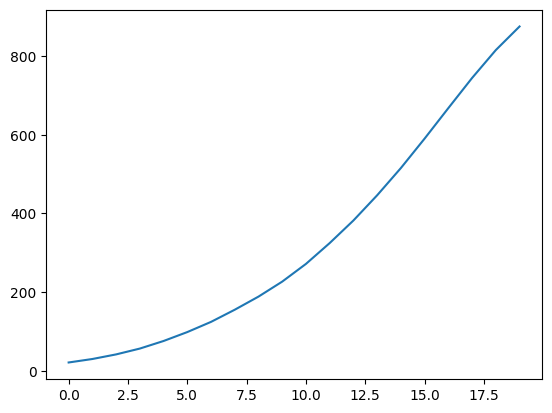

In [159]:
plt.plot(costs)

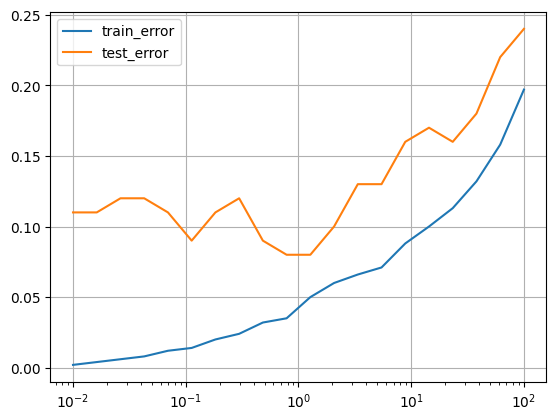

In [163]:
plt.plot(mu_,train_acc,label='train_error')
plt.plot(mu_,test_acc,label='test_error')
plt.xscale('log')
plt.grid()
plt.legend()